In [ ]:
from x2robot_dataset.common.datasets import (
    create_instance
)

from pathlib import Path

data_config = {'class_type':'image'}
data_folder = './data_builder/image_folder1'

image_builder = create_instance(data_config)

out_repo = image_builder.from_raw_to_videolazy_format(
        dataset_path = data_folder,
        force_overwrite = False,
        save_meta_data = True,
        class_type = 'image',
        root_dir = Path('./data_builder/.cache'),
    )
print(out_repo)

In [ ]:
from x2robot_dataset.lazy_dataset import make_lazy_dataset, X2RDataProcessingConfig
from pathlib import Path

data_folders = ['./data_builder/image_folder1', './data_builder/image_folder2']
data_configs = [X2RDataProcessingConfig(
        train_test_split=1.0,
        class_type='image',
    ).as_dict() for _ in range(len(data_folders))]

dataset = make_lazy_dataset(
    data_folders=data_folders,
    data_configs=data_configs,
    force_overwrite = False,
    save_meta_data = True,
    split = 'train',
    root_dir = Path('./data_builder/.cache'),
)

for data in dataset:
    for img in data['image']:
        print(img.shape)

In [ ]:
from x2robot_dataset.lazy_dataset import IterChunkDataset, X2RDataProcessingConfig,X2RDataChunkConfig

from pathlib import Path

data_folders = ['./data_builder/image_folder1', './data_builder/image_folder2']
data_configs = [X2RDataProcessingConfig(
        train_test_split=1.0,
        class_type='image',
    ).as_dict() for _ in range(len(data_folders))]

data_chunk_config = X2RDataChunkConfig()
dataset = IterChunkDataset(
            data_folders=data_folders, 
            data_configs=data_configs,
            data_chunk_config=data_chunk_config,
            force_overwrite = False,
            preload_pool_size = 2,
            num_preloader_threads = 2,
            max_frame_buffer_size = 100,
            num_frame_producer_threads = 2,
            root_dir = Path('./data_builder/.cache')
    )
dataset.reset_epoch(0)
for data in dataset:
    print(data['text'])

In [ ]:
from x2robot_dataset.lazy_dataset import IterChunkDataset, X2RDataProcessingConfig, X2RDataChunkConfig

from pathlib import Path

data_folders = [
        './data_builder/image_folder1', \
        './data_builder/video_folder', \
        '/x2robot/zhengwei/10000/20240410-clothes',\
]

data_configs = [X2RDataProcessingConfig(
        train_test_split=1.0,
    ).as_dict() for _ in range(len(data_folders))]
data_configs[0].update({'class_type':'image'})
data_configs[1].update({'class_type':'video'})
data_configs[2].update({'class_type':'x2'})

data_chunk_config = X2RDataChunkConfig()
dataset = IterChunkDataset(
            data_folders=data_folders, 
            data_configs=data_configs,
            data_chunk_config=data_chunk_config,
            force_overwrite = False,
            preload_pool_size = 2,
            num_preloader_threads = 2,
            max_frame_buffer_size = 100,
            num_frame_producer_threads = 2,
            root_dir = Path('./data_builder/.cache')
    )
dataset.reset_epoch(0)
for data in dataset:
    print(data['register_type'])
    break

In [ ]:
from datasets import Dataset

def join_dicts(data_dict, ep_dict):
    # 将 Dataset 转换为字典，方便处理
    data_dict_raw = {
        col: data_dict[col] for col in data_dict.column_names
    }
    ep_dict_raw = {
        col: ep_dict[col] for col in ep_dict.column_names
    }
    
    # 建立ep_dict的sample_name到索引的映射
    ep_name_to_idx = {name: idx for idx, name in enumerate(ep_dict_raw['sample_name'])}
    
    # 准备结果字典
    result_dict = {col: [] for col in data_dict.column_names}
    # 添加ep_dict中独有的列
    for col in ep_dict.column_names:
        if col not in result_dict:
            result_dict[col] = []
    
    # 遍历data_dict中的每一行
    for i, sample_name in enumerate(data_dict_raw['sample_name']):
        # 添加data_dict中的数据
        for col in data_dict.column_names:
            result_dict[col].append(data_dict_raw[col][i])
        
        # 寻找对应的ep_dict数据
        if sample_name in ep_name_to_idx:
            ep_idx = ep_name_to_idx[sample_name]
            # 添加ep_dict中的数据（除了sample_name）
            for col in ep_dict.column_names:
                if col != 'sample_name' and col not in data_dict.column_names:
                    result_dict[col].append(ep_dict_raw[col][ep_idx])
        else:
            # 不存在对应数据，填充None
            for col in ep_dict.column_names:
                if col != 'sample_name' and col not in data_dict.column_names:
                    result_dict[col].append(None)
    
    # 转换回Dataset对象
    return Dataset.from_dict(result_dict)

In [ ]:
data_dict = {'sample_name':['a', 'e', 'c'], 'data':[1, 2, 3]}
ep_dict = {'sample_name':['a', 'd', 'f'], 'data2':[4, 5, 6]}

from datasets import Dataset

data_dict = Dataset.from_dict(data_dict)
ep_dict = Dataset.from_dict(ep_dict)
result = join_dicts(data_dict, ep_dict)

In [ ]:
from x2robot_dataset.lazy_dataset import IterChunkDataset, X2RDataProcessingConfig, X2RDataChunkConfig

from pathlib import Path

data_folders = [
        './data_builder/x2_cond_folder/x2_cond1.json'
]

data_configs = [X2RDataProcessingConfig(
        train_test_split=1.0,
    ).as_dict() for _ in range(len(data_folders))]
data_configs[0].update({'class_type':'x2'})

data_chunk_config = X2RDataChunkConfig()
dataset = IterChunkDataset(
            data_folders=data_folders, 
            data_configs=data_configs,
            data_chunk_config=data_chunk_config,
            force_overwrite = True,
            save_meta_data = True,
            preload_pool_size = 2,
            num_preloader_threads = 2,
            max_frame_buffer_size = 100,
            num_frame_producer_threads = 2,
            root_dir = Path('./data_builder/.cache')
    )
dataset.reset_epoch(0)
import tqdm
for data in tqdm.tqdm(dataset, total=dataset.num_frames):
    if data['uid'] == 'factory10000_20241105-pick_up-sponge@TEACH_ARM@2024_11_05_17_22_08' and data['frame'] == 20:
        print(data['conditions.text'], data['conditions.image'])
        break

Registered class: LazyDataBuilder with key: hf
Registered class: X2DataBuilder with key: x2
Registered class: ZarrDataBuilder with key: zarr
Registered class: ImageDataBuilder with key: image
Registered class: VideoDataBuilder with key: video


Saving the dataset (0/1 shards):   0%|          | 0/47 [00:00<?, ? examples/s]

Dataset train[:100.0%] - Total episodes: 47
Dataset train[:100.0%] - Frame count list: 47
Dataset train[:100.0%] - Total frames: 9779
❌ Unable to stop preloader Thread-6 (_preloader_worker) rank: 0
❌ Unable to stop preloader Thread-7 (_preloader_worker) rank: 0


 47%|████▋     | 4629/9779 [00:45<00:50, 101.55it/s]

defaultdict(<function IterChunkDataset._generate_frames.<locals>.<lambda> at 0x7f1c6c749cf0>, {'actions': {'follow_left_ee_cartesian_pos': array([[-2.26741144e-03,  3.76044139e-02,  5.68721816e-03],
       [-2.16824701e-03,  3.78220007e-02,  5.67624206e-03],
       [-2.08772533e-03,  3.80590484e-02,  5.68376156e-03],
       [-1.91884651e-03,  3.84041257e-02,  5.64347580e-03],
       [-1.81553280e-03,  3.87759842e-02,  5.64767094e-03],
       [-1.72032183e-03,  3.92606296e-02,  5.67954034e-03],
       [-1.66159123e-03,  3.95953208e-02,  5.71730919e-03],
       [-1.51944417e-03,  4.13408205e-02,  5.93337836e-03],
       [-1.34856533e-03,  4.30791676e-02,  6.12019794e-03],
       [-1.09595864e-03,  4.50969674e-02,  6.26021391e-03],
       [-1.06161216e-03,  4.69597802e-02,  6.41201530e-03],
       [-1.20312709e-03,  4.87474315e-02,  6.46971213e-03],
       [-1.12412195e-03,  5.07297441e-02,  6.49043499e-03],
       [-6.92284957e-04,  5.27212024e-02,  6.47226535e-03],
       [-9.44945641e-

In [ ]:
data['conditions.text']

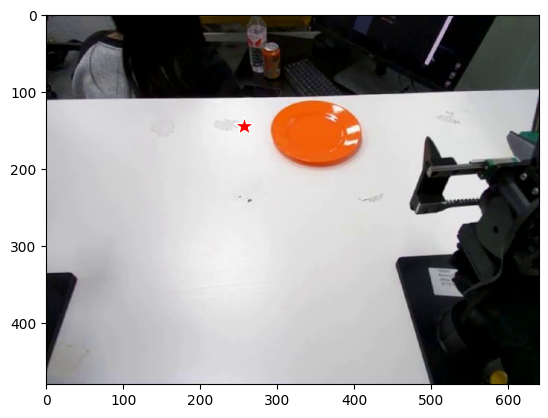

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

dir_path = '/x2robot/zhengwei/10049/20250317-day-pick_up-sponge-right/20250317-day-pick_up-sponge-right@TEACH_ARM@2025_03_17_17_56_31'

# load mp4 data
import cv2

cap = cv2.VideoCapture(f'{dir_path}/faceImg.mp4')

while True:
    ret, frame = cap.read()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    height, width = frame.shape[:2]
    x = 0.4 * width
    y = 0.3 * height
    plt.plot(x, y, marker='*', color='red', markersize=15, markeredgecolor='white')

    break

In [ ]:

# plt.imshow(frame)

In [ ]:
# print(frame)

In [ ]:
cap